In [32]:
from ultralytics import YOLO
import cv2
import torch
import gc
import os
from pathlib import Path
from IPython.display import Image
import shutil


torch.cuda.set_device(0)
results = {}

KITTI Dataset to YOLO conversion

In [33]:
#YOLO image organization
def create_text_img(imgnum, foldernum):
   
   new_name=str(int(foldernum)) + '_' + str(int(imgnum))
   #test train split
   if int(imgnum) %4 != 0:
      new_dir = '..\\..\\datasets\\yolo\\images\\train\\'
      newfile = f'..\\..\\datasets\\yolo\\labels\\train\\{new_name}.txt'
   else:
      new_dir = '..\\..\\datasets\\yolo\\images\\test\\'
      newfile = f'..\\..\\datasets\\yolo\\labels\\test\\{new_name}.txt'
   
   
   with open(newfile, "w") as file:
      pass
   

   
   image_path=f'..\\..\\datasets\\training\\image_02\\{foldernum}\\{str(imgnum).zfill(6)}.png'
   new_name=f'{new_name}.png'
   
   

   # Copy the file to the new location with the new name
   shutil.copy2(image_path, f'{new_dir}{new_name}')

   return newfile
      



In [34]:
#Label file organization

def readfile(file_path,filenum):
    nc=['Car','Cyclist','Pedestrian','Truck','Van','Tram','Misc','Person','DontCare']
    with open(file_path) as f:
        strfilenum=(str(filenum)).zfill(4)
        counter=-1
        for line in f:
            elements = line.split()

            imgnum = elements[0]
            
            if imgnum!=str(counter):
                newfile=create_text_img(imgnum, strfilenum)
                counter=imgnum
            
            label = elements[2]
            
            xmin = int(float(elements[6]))/1242
            ymin = int(float(elements[7]))/375
            xmax = int(float(elements[8]))/1242
            ymax = int(float(elements[9]))/375
            
            if nc.index(label)>5:
                continue     
            str_to_append = str(nc.index(label)) + " " + str((xmax+xmin)/2) + " " + str((ymin+ymax)/2) + " " + str(xmax-xmin) + " " + str(ymax-ymin) + "\n"
            imgnum = imgnum.zfill(6)

            with open(newfile, 'a') as file:
                file.write(str_to_append)

                     

                    
                # Check if the folder exists
                



..\..\datasets\training\label_02
0
fp- ..\..\datasets\training\label_02\0000.txt
1
fp- ..\..\datasets\training\label_02\0001.txt
2
fp- ..\..\datasets\training\label_02\0002.txt
3
fp- ..\..\datasets\training\label_02\0003.txt
4
fp- ..\..\datasets\training\label_02\0004.txt
5
fp- ..\..\datasets\training\label_02\0005.txt
6
fp- ..\..\datasets\training\label_02\0006.txt
7
fp- ..\..\datasets\training\label_02\0007.txt
8
fp- ..\..\datasets\training\label_02\0008.txt
9
fp- ..\..\datasets\training\label_02\0009.txt
10
fp- ..\..\datasets\training\label_02\0010.txt
11
fp- ..\..\datasets\training\label_02\0011.txt
12
fp- ..\..\datasets\training\label_02\0012.txt
13
fp- ..\..\datasets\training\label_02\0013.txt
14
fp- ..\..\datasets\training\label_02\0014.txt
15
fp- ..\..\datasets\training\label_02\0015.txt
16
fp- ..\..\datasets\training\label_02\0016.txt
17
fp- ..\..\datasets\training\label_02\0017.txt
18
fp- ..\..\datasets\training\label_02\0018.txt
19
fp- ..\..\datasets\training\label_02\0019.t

In [29]:
#Creating yolo style db
directory = "../../datasets/yolo"

#checking yolo directory
if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory created."+directory)
    os.makedirs(directory+"/images/train")
    os.makedirs(directory+"/images/test")
    os.makedirs(directory+"/labels/train")
    os.makedirs(directory+"/labels/test")
#checking images directory
image_directory = directory + "/images"
file_list = os.listdir(image_directory)

if len(file_list) == 0:
    # Run your script here
    folder_path = Path("..\\..\\datasets\\training\\label_02")
    print(folder_path)
    for filename in os.listdir(folder_path):
        # print("fn-",filename)
        filenum = filename.split('.')[0]
        filenum = int(filenum)
        print(filenum)
        file_path = os.path.join(folder_path, filename)

        print("fp-",file_path)

        readfile(file_path, filenum)


Directory created.../../datasets/yolo


In [38]:
cwd = Path.cwd()

# Read the content of the config file
with open('config.yaml', 'r') as file:
    config_content = file.readlines()

# Replace the first line
config_content[0] = f'path: {cwd.parents[1]}/datasets/yolo\n'

# Write the modified content back to the config file
with open('config.yaml', 'w') as file:
    file.writelines(config_content)


YOLO Training

In [39]:
#Garbage collection
gc.collect()
torch.cuda.empty_cache()

# YOLOv8n nano model
model = YOLO("../../saved-models/yolov8n.pt")
patience = 3

# Train the model
model.train(data="config.yaml", epochs=1, imgsz=640,device="gpu",patience=3, fliplr=0.5,mixup=0.1)
results["yolov8n"] = model.metrics

#Garbage collection
del model
gc.collect()
torch.cuda.empty_cache()

New https://pypi.org/project/ultralytics/8.1.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.45  Python-3.11.3 torch-2.2.2+cu121 CUDA:gpu (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
engine\trainer: task=detect, mode=train, model=../../saved-models/yolov8n.pt, data=config.yaml, epochs=1, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

train: Scanning C:\Users\James\Documents\automtive-cv\automotive-cv\datasets\yolo\labels\train... 5936 images, 122 backgrounds, 0 corrupt: 100%|██████████| 5936/5936 [00:11<00:00, 498.34it/s]


train: New cache created: C:\Users\James\Documents\automtive-cv\automotive-cv\datasets\yolo\labels\train.cache


val: Scanning C:\Users\James\Documents\automtive-cv\automotive-cv\datasets\yolo\labels\test... 1988 images, 40 backgrounds, 0 corrupt: 100%|██████████| 1988/1988 [00:05<00:00, 384.18it/s]


val: New cache created: C:\Users\James\Documents\automtive-cv\automotive-cv\datasets\yolo\labels\test.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.28G      1.503       1.74      1.116        202        640: 100%|██████████| 371/371 [00:48<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:15<00:00,  4.01it/s]


                   all       1988      11477      0.657      0.532      0.577      0.357

1 epochs completed in 0.019 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.11.3 torch-2.2.2+cu121 CUDA:gpu (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:14<00:00,  4.35it/s]


                   all       1988      11477      0.657      0.532      0.577      0.357
                   Car       1988       6834      0.794      0.729      0.812      0.548
               Cyclist       1988        488      0.798       0.38      0.472      0.258
            Pedestrian       1988       2879      0.628      0.612      0.648      0.312
                 Truck       1988        297      0.704      0.687      0.732      0.572
                   Van       1988        829      0.591      0.275      0.406      0.277
                  Tram       1988        150       0.43      0.507      0.393      0.173
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train2


In [ ]:
model = YOLO("../../saved-models/yolov8s.pt")
patience = 3
model.train(data="config.yaml", epochs=1, imgsz=640,device="gpu",fliplr=0.5,mixup=0.1,patience=3)
results["yolov8s"] = model.metrics

New https://pypi.org/project/ultralytics/8.1.46 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.45  Python-3.11.3 torch-2.2.2+cu121 CUDA:gpu (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=100, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning C:\Users\James\Documents\automtive-cv\automotive-cv\datasets\yolo\labels\train.cache... 5936 images, 122 backgrounds, 0 corrupt: 100%|██████████| 5936/5936 [00:00<?, ?it/s]
val: Scanning C:\Users\James\Documents\automtive-cv\automotive-cv\datasets\yolo\labels\test.cache... 1988 images, 40 backgrounds, 0 corrupt: 100%|██████████| 1988/1988 [00:00<?, ?it/s]


Plotting labels to runs\detect\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train13
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.17G      1.354      1.368      1.095        202        640: 100%|██████████| 371/371 [00:55<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11<00:00,  5.43it/s]

                   all       1988      11477       0.74      0.654      0.697      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.1G      1.217     0.8806       1.05        180        640: 100%|██████████| 371/371 [00:49<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.00it/s]

                   all       1988      11477      0.765      0.643      0.743       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.24G      1.186     0.8332      1.042        216        640: 100%|██████████| 371/371 [00:48<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.30it/s]

                   all       1988      11477      0.856      0.683      0.803      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       4.1G      1.145     0.7879      1.026        235        640: 100%|██████████| 371/371 [00:46<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.45it/s]

                   all       1988      11477      0.842      0.752      0.835      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.23G      1.106     0.7461       1.01        171        640: 100%|██████████| 371/371 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.41it/s]

                   all       1988      11477      0.886      0.768      0.869      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.09G      1.073     0.7136     0.9962        196        640: 100%|██████████| 371/371 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.46it/s]

                   all       1988      11477      0.895       0.79      0.885      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.09G      1.046     0.6922     0.9894        186        640: 100%|██████████| 371/371 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.88it/s]

                   all       1988      11477      0.894      0.786       0.89      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.09G      1.021     0.6625     0.9806        156        640: 100%|██████████| 371/371 [00:46<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.97it/s]

                   all       1988      11477      0.894      0.797      0.896      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.24G          1     0.6435     0.9672        233        640: 100%|██████████| 371/371 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.25it/s]

                   all       1988      11477      0.915      0.808      0.908      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.19G     0.9787     0.6286     0.9628        223        640: 100%|██████████| 371/371 [00:46<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.48it/s]

                   all       1988      11477      0.912      0.825      0.914      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.09G      0.968     0.6138     0.9601        226        640: 100%|██████████| 371/371 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.37it/s]

                   all       1988      11477      0.906      0.837       0.92      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.08G     0.9491     0.6018     0.9529        174        640: 100%|██████████| 371/371 [00:47<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.28it/s]

                   all       1988      11477      0.914      0.856       0.93      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.23G     0.9426     0.5923     0.9498        196        640: 100%|██████████| 371/371 [00:45<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.82it/s]

                   all       1988      11477      0.935      0.836      0.933      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.24G     0.9347     0.5881     0.9482        226        640: 100%|██████████| 371/371 [00:46<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.81it/s]

                   all       1988      11477      0.928      0.866      0.939      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.09G     0.9096      0.572     0.9402        220        640: 100%|██████████| 371/371 [00:46<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.23it/s]

                   all       1988      11477      0.929      0.872      0.944      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.09G      0.902     0.5613     0.9372        174        640: 100%|██████████| 371/371 [00:46<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.68it/s]

                   all       1988      11477       0.92      0.884      0.946      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.07G     0.8917     0.5507      0.932        185        640: 100%|██████████| 371/371 [00:46<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.25it/s]

                   all       1988      11477      0.931      0.868      0.943      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.19G      0.886     0.5499     0.9306        151        640: 100%|██████████| 371/371 [00:46<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.22it/s]

                   all       1988      11477      0.944      0.876      0.951      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.17G     0.8765     0.5463     0.9271        201        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.76it/s]

                   all       1988      11477      0.938      0.889       0.95      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.09G     0.8674     0.5348     0.9245        143        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11<00:00,  5.70it/s]

                   all       1988      11477      0.943      0.887      0.951      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.22G      0.859     0.5286     0.9208        230        640: 100%|██████████| 371/371 [00:45<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.52it/s]

                   all       1988      11477      0.948       0.89      0.954      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.09G     0.8558     0.5265     0.9196        279        640: 100%|██████████| 371/371 [00:45<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.30it/s]

                   all       1988      11477      0.934      0.899      0.955      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       4.1G     0.8392     0.5131     0.9144        157        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.98it/s]

                   all       1988      11477      0.943      0.897      0.957      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.09G     0.8364     0.5149     0.9131        259        640: 100%|██████████| 371/371 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.03it/s]

                   all       1988      11477      0.946      0.906      0.958      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.22G     0.8306     0.5078     0.9106        155        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.11it/s]

                   all       1988      11477      0.949      0.899      0.958      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.09G     0.8271     0.5052     0.9088        180        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.74it/s]

                   all       1988      11477      0.952      0.892      0.956      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.09G     0.8182     0.5025     0.9084        160        640: 100%|██████████| 371/371 [00:45<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.61it/s]

                   all       1988      11477      0.955        0.9      0.959      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.24G     0.8115     0.4952      0.908        137        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.37it/s]

                   all       1988      11477       0.95      0.902      0.961      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.22G     0.8095     0.4921     0.9034        169        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.89it/s]

                   all       1988      11477      0.956      0.911      0.962      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.08G      0.801     0.4869     0.9035        256        640: 100%|██████████| 371/371 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.31it/s]

                   all       1988      11477       0.96      0.908      0.964      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.09G     0.7943     0.4807        0.9        153        640: 100%|██████████| 371/371 [00:45<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.63it/s]

                   all       1988      11477      0.946      0.915      0.963      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       4.1G     0.7905     0.4798     0.8979        185        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.35it/s]

                   all       1988      11477      0.951      0.914      0.965      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.23G     0.7896     0.4766     0.8984        202        640: 100%|██████████| 371/371 [00:45<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.05it/s]

                   all       1988      11477       0.95      0.922      0.967      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.09G     0.7822     0.4729     0.8969        141        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.82it/s]

                   all       1988      11477      0.962      0.915      0.967      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.24G     0.7759     0.4694     0.8906        231        640: 100%|██████████| 371/371 [00:45<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.24it/s]

                   all       1988      11477      0.958      0.925      0.967       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.24G     0.7686     0.4648     0.8942        148        640: 100%|██████████| 371/371 [00:45<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.46it/s]

                   all       1988      11477       0.95      0.924      0.966      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.23G     0.7676     0.4639     0.8923        193        640: 100%|██████████| 371/371 [00:45<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.36it/s]

                   all       1988      11477      0.952      0.924      0.967      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.05G      0.766     0.4601     0.8909        160        640: 100%|██████████| 371/371 [00:45<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.86it/s]

                   all       1988      11477       0.97      0.916      0.968      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.08G     0.7507     0.4534     0.8841        234        640: 100%|██████████| 371/371 [00:45<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.88it/s]

                   all       1988      11477      0.955       0.92      0.968      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.18G     0.7554     0.4558     0.8877        184        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.47it/s]

                   all       1988      11477      0.963      0.918      0.968      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.32G     0.7455     0.4489     0.8855        215        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.14it/s]

                   all       1988      11477      0.967      0.922      0.969        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.42G     0.7514     0.4552     0.8871        253        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.12it/s]

                   all       1988      11477      0.962      0.929       0.97        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.08G     0.7398     0.4438     0.8813        246        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.79it/s]

                   all       1988      11477      0.953      0.929       0.97      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.09G     0.7439     0.4476     0.8855        234        640: 100%|██████████| 371/371 [00:45<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11<00:00,  5.69it/s]

                   all       1988      11477      0.962      0.926      0.969      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.23G     0.7328     0.4406     0.8793        226        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.21it/s]

                   all       1988      11477      0.963      0.929       0.97      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.09G     0.7291     0.4388     0.8791        202        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.18it/s]

                   all       1988      11477      0.957      0.928       0.97       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.24G     0.7264     0.4359     0.8793        191        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.49it/s]

                   all       1988      11477      0.966       0.93      0.971      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.25G     0.7208     0.4331     0.8771        216        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.05it/s]

                   all       1988      11477      0.965      0.931      0.973      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.23G     0.7155     0.4284     0.8765        274        640: 100%|██████████| 371/371 [00:45<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.25it/s]

                   all       1988      11477      0.969      0.929      0.972      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.25G     0.7107     0.4271     0.8753        165        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.78it/s]

                   all       1988      11477      0.974      0.924      0.972      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.24G      0.712     0.4256     0.8751        117        640: 100%|██████████| 371/371 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.80it/s]

                   all       1988      11477      0.971      0.926      0.974      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.09G     0.7051     0.4241     0.8743        129        640: 100%|██████████| 371/371 [00:45<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.42it/s]

                   all       1988      11477      0.966      0.934      0.973      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.07G     0.7077     0.4265     0.8742        324        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]

                   all       1988      11477      0.963      0.939      0.975      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.08G     0.7006     0.4201     0.8725        207        640: 100%|██████████| 371/371 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.42it/s]

                   all       1988      11477      0.968      0.932      0.974      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.35G        0.7     0.4175     0.8715        172        640: 100%|██████████| 371/371 [00:45<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.53it/s]

                   all       1988      11477       0.97      0.934      0.975      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.09G     0.6919     0.4139     0.8697        280        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.58it/s]

                   all       1988      11477       0.97      0.933      0.975      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.35G     0.6822     0.4089     0.8692        213        640: 100%|██████████| 371/371 [00:45<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.33it/s]

                   all       1988      11477       0.97      0.937      0.974      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.24G     0.6879      0.414     0.8698        205        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11<00:00,  5.69it/s]

                   all       1988      11477       0.97      0.937      0.976      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.25G     0.6877     0.4106     0.8697        225        640: 100%|██████████| 371/371 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.22it/s]

                   all       1988      11477      0.971      0.939      0.974      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.25G     0.6813     0.4064     0.8665        177        640: 100%|██████████| 371/371 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.76it/s]

                   all       1988      11477      0.962      0.944      0.976      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.23G     0.6823     0.4076     0.8669        239        640: 100%|██████████| 371/371 [00:45<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.36it/s]

                   all       1988      11477      0.968      0.941      0.976      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.09G     0.6777      0.405     0.8666        183        640: 100%|██████████| 371/371 [00:45<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.31it/s]

                   all       1988      11477      0.972      0.934      0.977      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.09G      0.671     0.4002     0.8633        185        640: 100%|██████████| 371/371 [00:45<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.77it/s]

                   all       1988      11477      0.967      0.944      0.977      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       4.2G     0.6747     0.4024     0.8671        202        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  5.99it/s]

                   all       1988      11477      0.964      0.943      0.977      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.06G      0.665     0.3967     0.8623        212        640: 100%|██████████| 371/371 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.54it/s]

                   all       1988      11477      0.974      0.938      0.977       0.83
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 62, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



65 epochs completed in 1.025 hours.
Optimizer stripped from runs\detect\train13\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train13\weights\best.pt, 22.5MB

Validating runs\detect\train13\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.11.3 torch-2.2.2+cu121 CUDA:gpu (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:14<00:00,  4.28it/s]


                   all       1988      11477      0.972      0.934      0.977      0.833
                   Car       1988       6834      0.964       0.95      0.983      0.864
               Cyclist       1988        488      0.967      0.912      0.966      0.792
            Pedestrian       1988       2879      0.961      0.848      0.939      0.648
                 Truck       1988        297      0.993      0.986       0.99      0.921
                   Van       1988        829      0.969      0.958      0.991      0.866
                  Tram       1988        150      0.978      0.947      0.992      0.908
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train13


#Folders deleted and and train13 and train14 have been renamed train2 and train1.

In [ ]:
import os
from pathlib import Path

def get_latest(directory):
    # Get all directories sorted by modification time in descending order
    sorted_folders = sorted([d for d in Path(directory).iterdir() if d.is_dir()], 
                            key=lambda x: x.stat().st_mtime, reverse=True)

    # Return the latest and second latest folders based on availability
    return (sorted_folders[0], sorted_folders[1]) if len(sorted_folders) > 1 else (sorted_folders[0], None) if sorted_folders else (None, None)

# Example usage
nano, small = get_latest('runs/detect')
print("nano:", nano)
print("small:", small)



nano: runs\detect\train1
small: runs\detect\train2


NANO Results

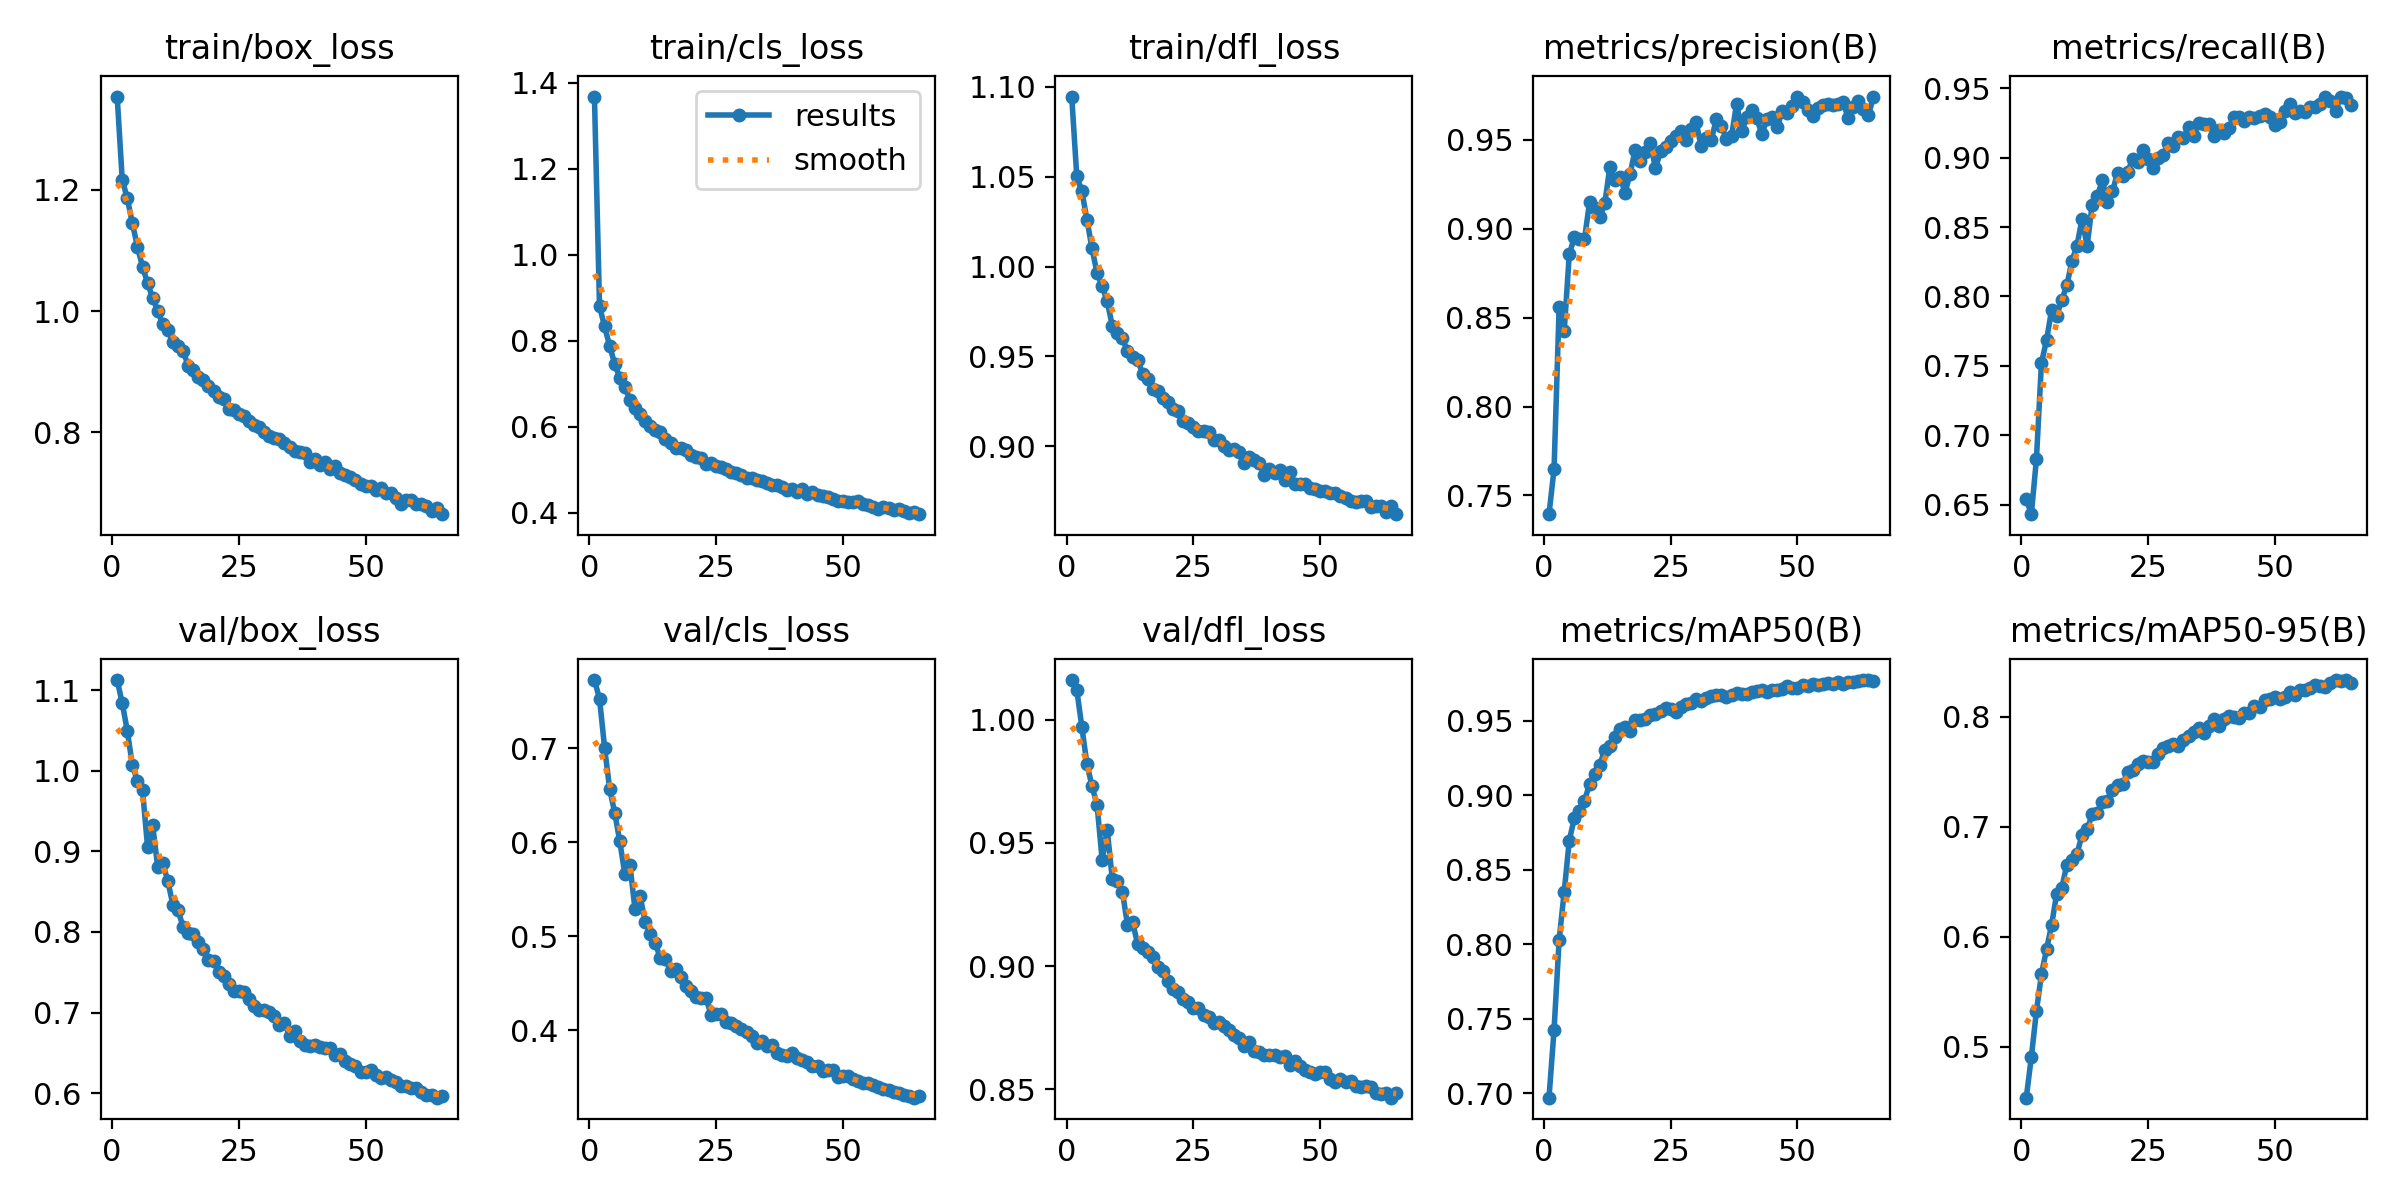

In [ ]:
# Display the results
Image(f"{nano}/results.png")

SMALL Results


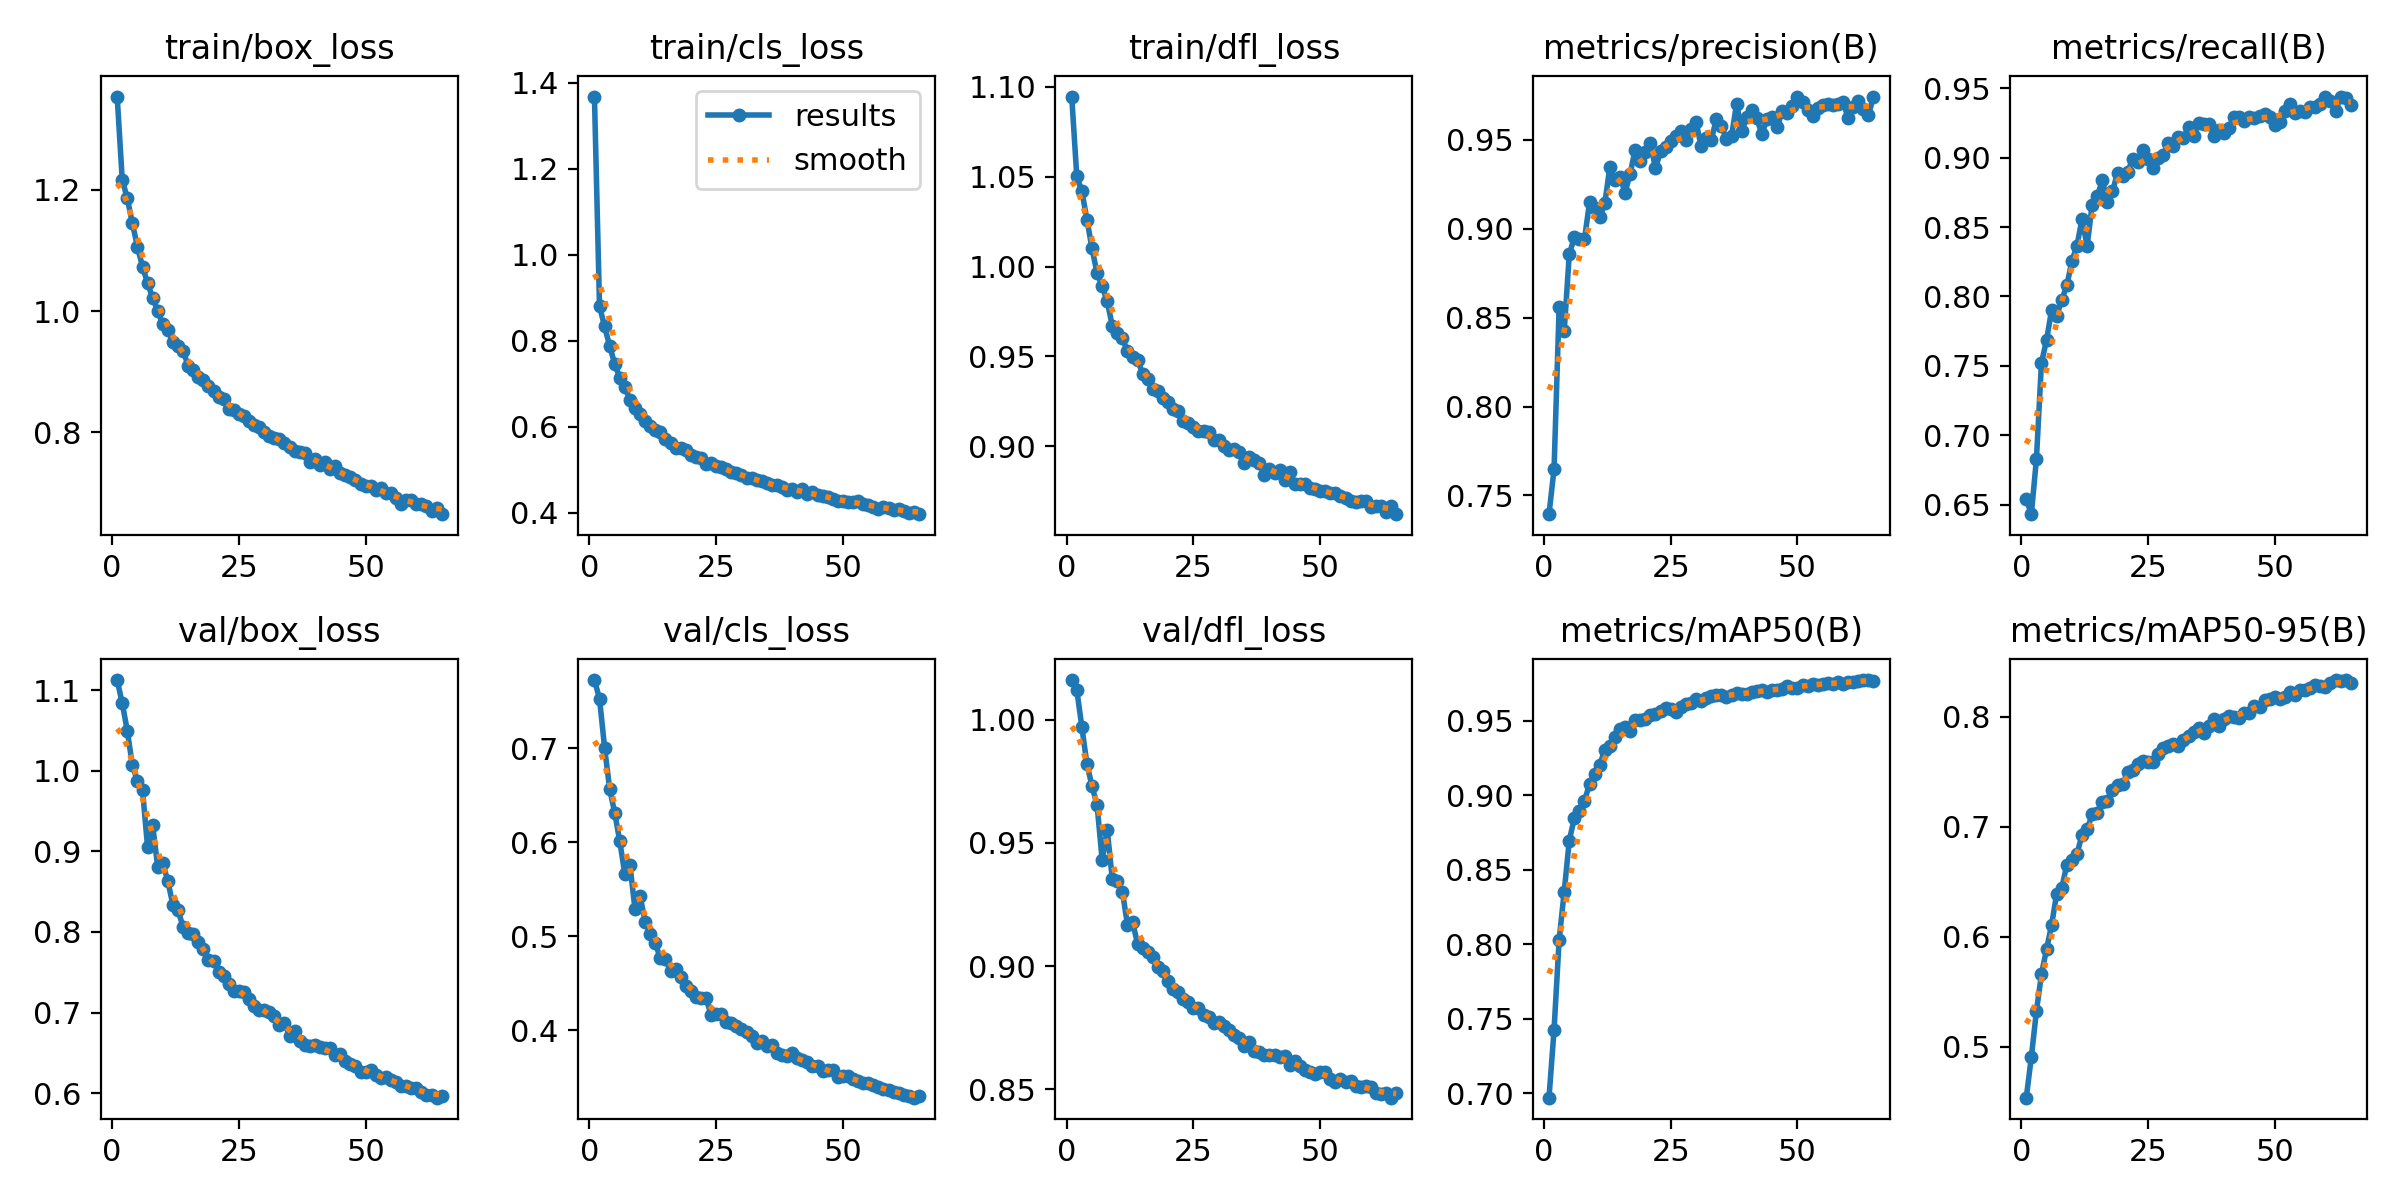

In [ ]:
# Display the results
Image(f"{small}/results.png")

In [ ]:
#Garbage collection 
gc.collect()
torch.cuda.empty_cache()
project='../../detection-outputs/videos/yolov8'
model = YOLO(f"{small}/weights/best.pt")
# YOLOv8 predict
print(os.getcwd())
model.predict("../../testsets/videos/test.mp4",save=True,project=project)

c:\Users\James\Documents\automtive-cv\automotive-cv\object-and-vehicle-detection-classification\YOLOv8


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1800) c:\Users\James\Documents\automtive-cv\automotive-cv\object-and-vehicle-detection-classification\YOLOv8\..\..\testsets\videos\test.mp4: 384x640 10 Cars, 1 Truck, 2 Vans, 40.9ms
video 1/1 (frame 2/1800) c:\Users\James\Documents\automtive-cv\automotive-cv\object-and-vehicle-detection-classification\YOLOv8\..\..\testsets\videos\test

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Car', 1: 'Cyclist', 2: 'Pedestrian', 3: 'Truck', 4: 'Van', 5: 'Tram'}
 obb: None
 orig_img: array([[[12,  9, 10],
         [12,  9, 10],
         [14, 11, 12],
         ...,
         [12,  9,  8],
         [11,  8,  7],
         [10,  7,  6]],
 
        [[12,  9, 10],
         [13, 10, 11],
         [14, 11, 12],
         ...,
         [13, 10,  9],
         [12,  9,  8],
         [11,  8,  7]],
 
        [[14, 11, 12],
         [14, 11, 12],
         [15, 12, 13],
         ...,
         [15, 12, 11],
         [14, 11, 10],
         [13, 10,  9]],
 
        ...,
 
        [[22, 17, 16],
         [23, 18, 17],
         [27, 22, 21],
         ...,
         [18, 15, 14],
         [17, 14, 13],
         [17, 14, 13]],
 
        [[21, 16, 15],
         [21, 16, 15],
         [24, 19, 18],
         ...,
         [17, 14, 13],
         [15, 1